In [35]:
import numpy as np
import numpy.random as random
from scipy.stats import binom
from scipy.stats import norm
from plotnine import *

from pandas import Series
from pandas import DataFrame

In [93]:
rv = binom(100, 0.5)
mean, var, skew, kurt = binom.stats(100, 0.5, moments='mvsk')
print(mean,var)
mean, var, skew, kurt = norm.stats(100, 0.5, moments='mvsk')
print(mean,var)


50.0 25.0
100.0 0.25


In [114]:
df = (DataFrame({'x': list(range(25,76,1))})
      .assign(pr = lambda df: rv.pmf(df['x']))
      .assign(z = lambda df: (df['x']-50)/(10*0.5))
      .assign(apr = lambda df: norm.pdf(df['z'])/5))

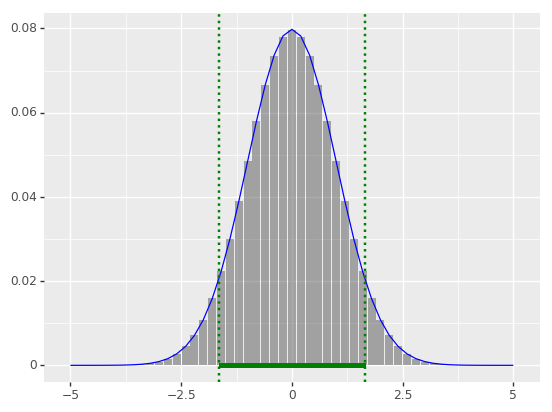

<ggplot: (7548991808)>

In [127]:
p = ggplot(df)
p = p + geom_col(aes(x = 'z', y = 'pr'), alpha=0.5)
p = p + geom_line(aes(x = 'z', y='apr'), color='blue')
p = p + geom_segment(x=norm.ppf(0.05), xend=norm.ppf(0.95), y=0, yend=0, color="green", size=2)
p = p + geom_vline(xintercept=norm.ppf(0.05), color = 'green', linetype=':', size=1)
p = p + geom_vline(xintercept=norm.ppf(0.95), color = 'green', linetype=':', size=1)
p = p + scale_x_continuous(name = "")
p = p + scale_y_continuous(name = "")
p.save('normal_approximation.pdf', path='results', height=6, width=12, verbose=False)
display(p)

In [117]:
norm.ppf(0.05)

-1.6448536269514729